[View in Colaboratory](https://colab.research.google.com/github/akshastry/Reinforcement_learning_CMSC389F/blob/master/Cart_Pole_Q_learning.ipynb)

Reference: https://github.com/openai/gym/wiki/MountainCar-v0

Video: https://www.youtube.com/watch?v=7sgilwJ9Fig

In [23]:
!pip install gym #environments
!pip install keras #neural networks


In [0]:
import gym
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

from collections import deque

In [0]:
# Deep Q-learning Agent
class DQNAgent:
    def __init__(self, env):
        self.env = env # environment
        self.state_size = len(env.observation_space.high) # number of state parameters
        self.action_size = env.action_space.n # number of possible actions
        self.memory = deque(maxlen=10000) # memory stores max of 10000 events
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01 
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001 # for the neural net
        self.model = self._build_model() # untrained neural net
        
    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
#         # Store this experience in memory
#         pos = next_state[0][0]
#         v = next_state[0][1]
        
#         # Changing the reward function!
#         reward = abs(v) + abs(pos + 0.5)/10
        
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        # Act in an epsilon greedy manner
        if np.random.rand() <= self.epsilon:
            return env.action_space.sample()
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  
    
    def act_greedy(self, state):
        # Act in a greedy manner after environment is solved
        return np.argmax(self.model.predict(state)[0]) 
    
    def replay(self, batch_size):
        # Learn from past experiences
        if batch_size > len(self.memory):
            return
        
        minibatch = random.sample(self.memory, batch_size) # Pick a random x amount of experiences to learn from
        for state, action, reward, next_state, done in minibatch:
            target = reward 
            # If we're at a terminal state, no need to look at next state
            if not done:
                # Standard value function
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target # alpha = 1 in this agent
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [30]:
# initialize gym environment and the agent
    env = gym.make('CartPole-v1')
    agent = DQNAgent(env)
    episodes = 5000
    rewards = deque(maxlen=100)
    
    #Build Memory
    for _ in range(50):
        state = env.reset()
        state = np.reshape(state, [1, 4])
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, 4])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
    
    #Learn
    for e in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, 4])
        done = False
        R = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, 4])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            R += reward
            if done:
                print("episode: {}/{}, reward: {}"
                      .format(e+1, episodes, R))
                rewards.append(R)
                break
        if e >= 100 and np.average(rewards) > 195:
            print("Environment Solved")
            break
        agent.replay(50)

episode: 1/5000, reward: 16.0
episode: 2/5000, reward: 12.0
episode: 3/5000, reward: 33.0
episode: 4/5000, reward: 14.0
episode: 5/5000, reward: 13.0
episode: 6/5000, reward: 18.0
episode: 7/5000, reward: 30.0
episode: 8/5000, reward: 13.0
episode: 9/5000, reward: 11.0
episode: 10/5000, reward: 14.0
episode: 11/5000, reward: 15.0
episode: 12/5000, reward: 12.0
episode: 13/5000, reward: 38.0
episode: 14/5000, reward: 16.0
episode: 15/5000, reward: 40.0
episode: 16/5000, reward: 20.0
episode: 17/5000, reward: 13.0
episode: 18/5000, reward: 31.0
episode: 19/5000, reward: 15.0
episode: 20/5000, reward: 15.0
episode: 21/5000, reward: 12.0
episode: 22/5000, reward: 17.0
episode: 23/5000, reward: 46.0
episode: 24/5000, reward: 16.0
episode: 25/5000, reward: 60.0
episode: 26/5000, reward: 15.0
episode: 27/5000, reward: 14.0
episode: 28/5000, reward: 10.0
episode: 29/5000, reward: 20.0
episode: 30/5000, reward: 16.0
episode: 31/5000, reward: 36.0
episode: 32/5000, reward: 20.0
episode: 33/5000,

In [0]:

!pip -q install pyopengl
!pip -q install pyvirtualdisplay
!pip -q install pyglet
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!apt-get -qq -y install libcusparse9.1 libnvrtc9.1 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.9.1 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so

test episode: 0 R: 200.0
test episode: 1 R: 200.0
test episode: 2 R: 200.0


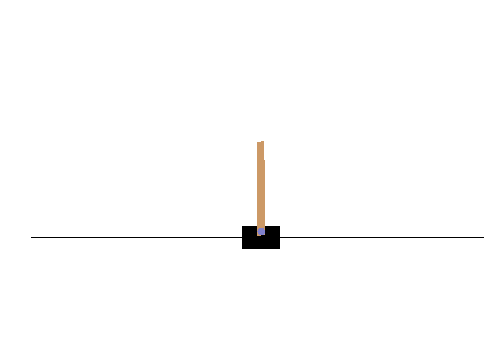

In [32]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

frames = []
for i in range(3):
    obs = env.reset()
    obs = obs.reshape(1,4)
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        action = agent.act_greedy(obs)
        obs, r, done, _ = env.step(action)
        obs = obs.reshape(1,4)
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())